<a href="https://colab.research.google.com/github/Pittella0/HomeWork/blob/main/WK11HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Data Set is about Amazons 50 Bestselling books from 2009 to 2022

Collection Method:
<br>
Used dataset from Amazon Top 50 Bestselling Books 2009 - 2019 for Coursera Google Data Analytics Certificate capstone case study project, scraping Amazon with R to add data from 2020, 2021, and 2022 (January 1 to March 26, 2022); as publishing professional, assigned Fiction and Non Fiction to 2020, 2021, and 2022 books, using Goodreads.com when unsure

In [2]:
# load up some pandas and what not
import string as strg
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

URL="https://raw.githubusercontent.com/Pittella0/HomeWork/main/bestsellers_with_categories_2022_03_27.csv"

df = pd.read_csv( URL, encoding = 'unicode_escape')

copy_df = df.copy()
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [18]:
shape=df.shape
anyNull=df.isnull().sum()
print(f"The shape of the data {shape}")
print(f"Any Null values {anyNull}")

The shape of the data (700, 7)
Any Null values Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


## Which is more popular: Fiction or Non-Fiction?

Non Fiction    388
Fiction        312
Name: Genre, dtype: int64


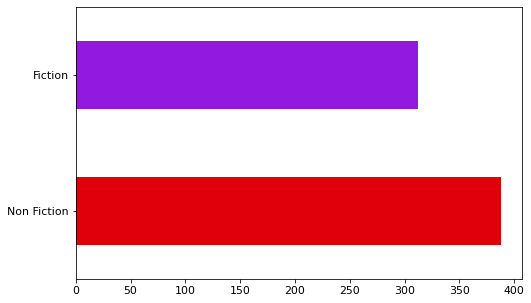

In [3]:
plt.figure(figsize=(8,5))
print(df['Genre'].value_counts())
df['Genre'].value_counts().plot(kind='barh',color=["#E0000B","#9119E0"], fontsize = 11)

Not surprised Non-Fiction won, but I am surprised the lead was only 76. 

## Now lets plot a histogram

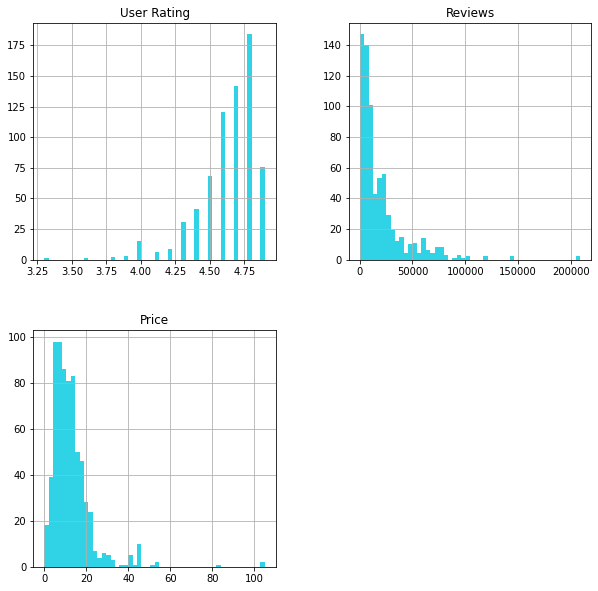

In [6]:
df_numerical = df.drop(['Genre','Name','Author','Year'],axis = 1)

df_numerical.hist(bins=50,color='#30D3E6', figsize=(10,10))
plt.show()

Cardinality
<br>
Is a mathematical term. It translates into the number of elements in a set. In databases, cardinality refers to the relationships between the data in two database tables. Cardinality defines how many instances of one entity are related to instances of another entity
<br>


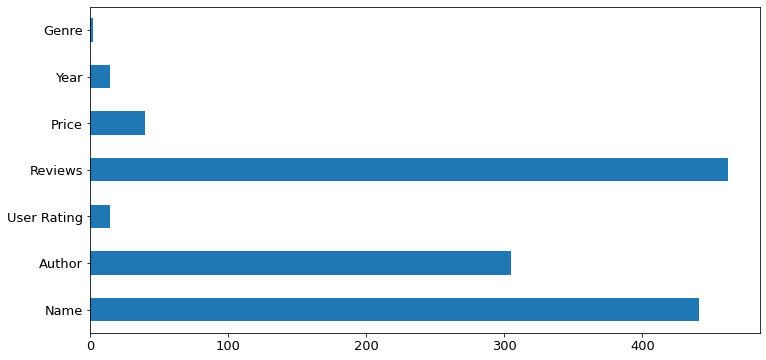

In [8]:
df.nunique().plot.barh(figsize=(12,6),fontsize=13)

# Histogram


Here we can see that price for the books for most books is under $20
<br>
We can also see that the higher the User Rating the more Reviews that were left. Seems like people are more likely to leave a review if they like the book.
<br>
We can also see a huge increase in reviews during 2020, makes you think that 2020 was such a crazy time people actually left more then triple the amount of reviews for Amazon books…People wrote book reports for fun… Because of covid

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79ef239c10>,
      dtype=object)

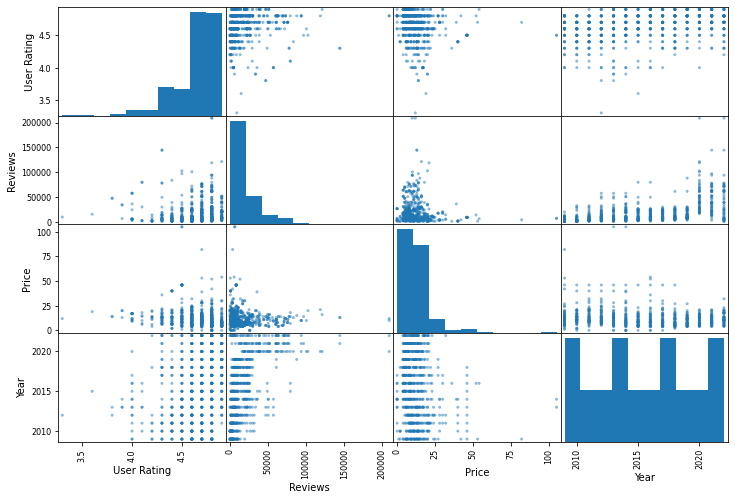

In [4]:
from pandas.plotting import scatter_matrix

attributes = ['User Rating','Reviews','Price','Year']
scatter_matrix(df[attributes], figsize=(12, 8))

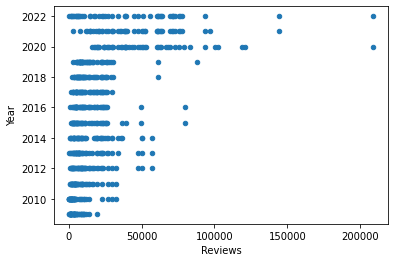

In [14]:

df.plot.scatter(x='Reviews', y='Year')

In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Final thoughts

People review books they like, and book reviews are increasing since 2020